In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import HuberRegressor

In [2]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\household_power_consumption.csv")
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\arups\AppData\Local\Temp\ipykernel_4168\2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
df.isnull().mean()*100

Date                     0.00000
Time                     0.00000
Global_active_power      0.00000
Global_reactive_power    0.00000
Voltage                  0.00000
Global_intensity         0.00000
Sub_metering_1           0.00000
Sub_metering_2           0.00000
Sub_metering_3           0.38805
dtype: float64

In [5]:
duplicate = df.duplicated()
df.drop_duplicates(inplace = True)

In [6]:
df.replace('?', np.nan, inplace=True)
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[columns_to_convert] = df[columns_to_convert].astype(float)

In [7]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64

In [7]:
df.dropna(inplace = True)
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
# In Watt-Hour
df['electric_power_consumption'] = df['Global_active_power'] + df['Global_reactive_power']
df['Total_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'] , axis = 1 , inplace = True)

In [9]:
df.drop(['Time'] , axis = 1 , inplace = True)

In [10]:
desired_order = ['Date','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Total_metering','electric_power_consumption']
df = df[desired_order]
df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_metering,electric_power_consumption
0,2006-12-16,4.216,0.418,234.84,18.4,18.0,4.634
1,2006-12-16,5.360,0.436,233.63,23.0,17.0,5.796
2,2006-12-16,5.374,0.498,233.29,23.0,19.0,5.872
3,2006-12-16,5.388,0.502,233.74,23.0,18.0,5.890
4,2006-12-16,3.666,0.528,235.68,15.8,18.0,4.194
...,...,...,...,...,...,...,...
1048570,2008-12-13,0.426,0.076,242.27,1.8,0.0,0.502
1048571,2008-12-13,0.424,0.076,242.10,1.8,0.0,0.500
1048572,2008-12-13,0.422,0.076,241.73,1.8,0.0,0.498
1048573,2008-12-13,0.422,0.078,242.56,1.8,0.0,0.500


In [12]:
def plot_col(data , cols):
    for val in cols:
        plt.figure(figsize=(12, 6)) 
        plt.subplot(121)
        sns.kdeplot(data[val], label=val)
        plt.title('NORMAL DISTRIBUTION PLOT')
        plt.legend()
        plt.subplot(122)
        stats.probplot(data[val] ,plot = plt )
        plt.title('QQ PLOT')
        plt.show()

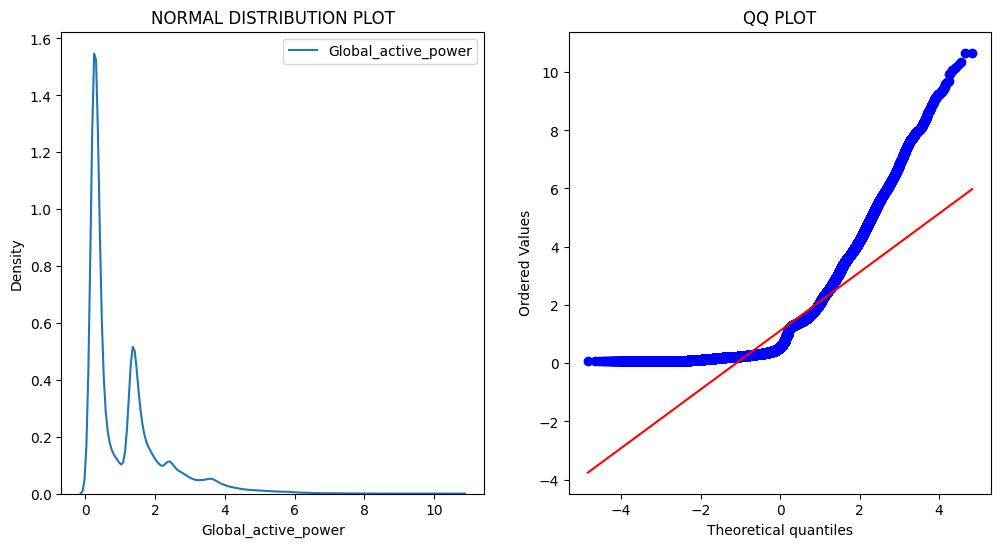

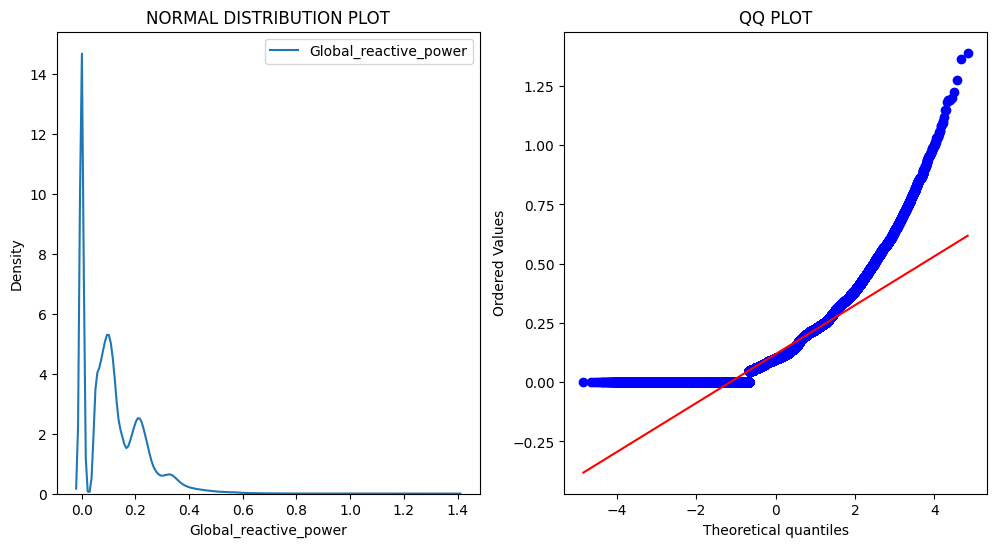

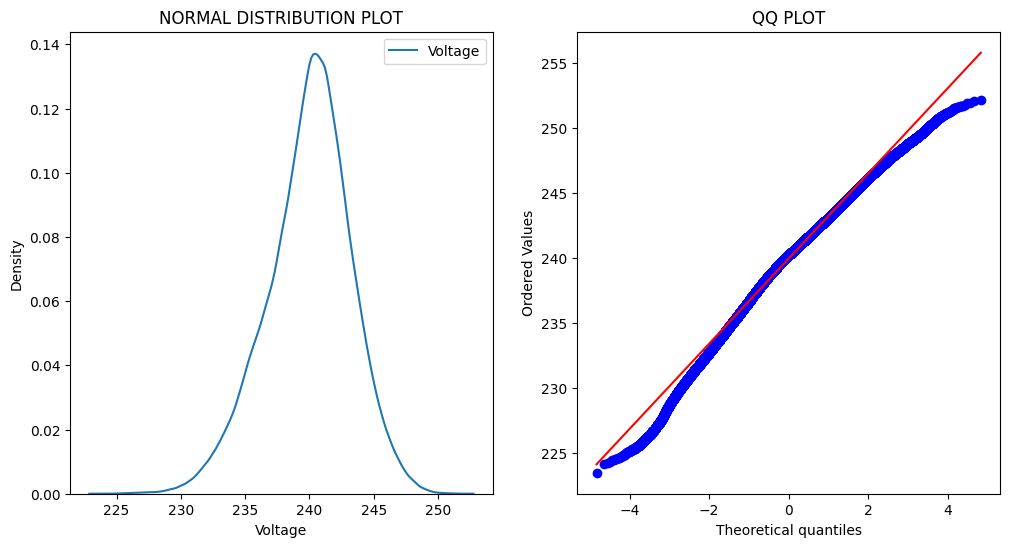

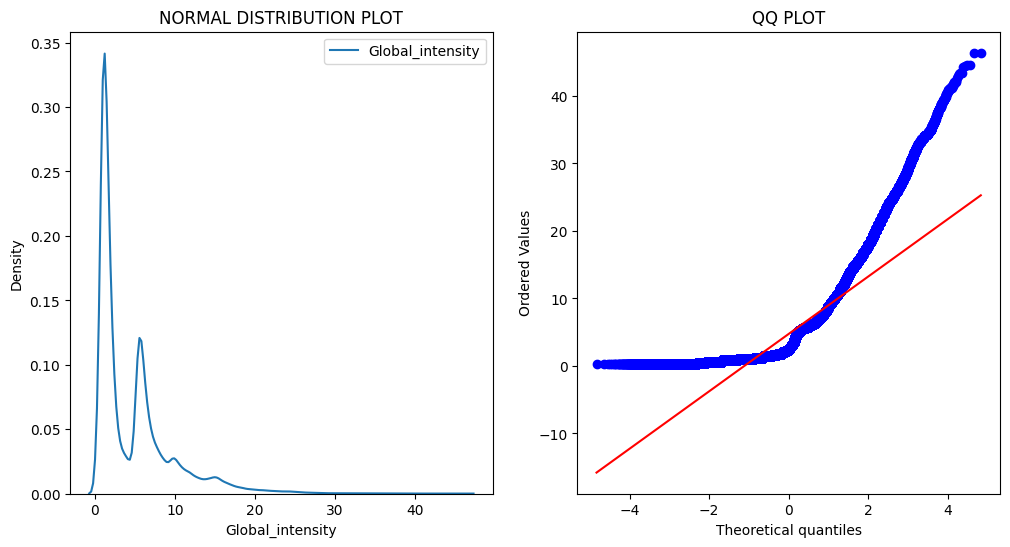

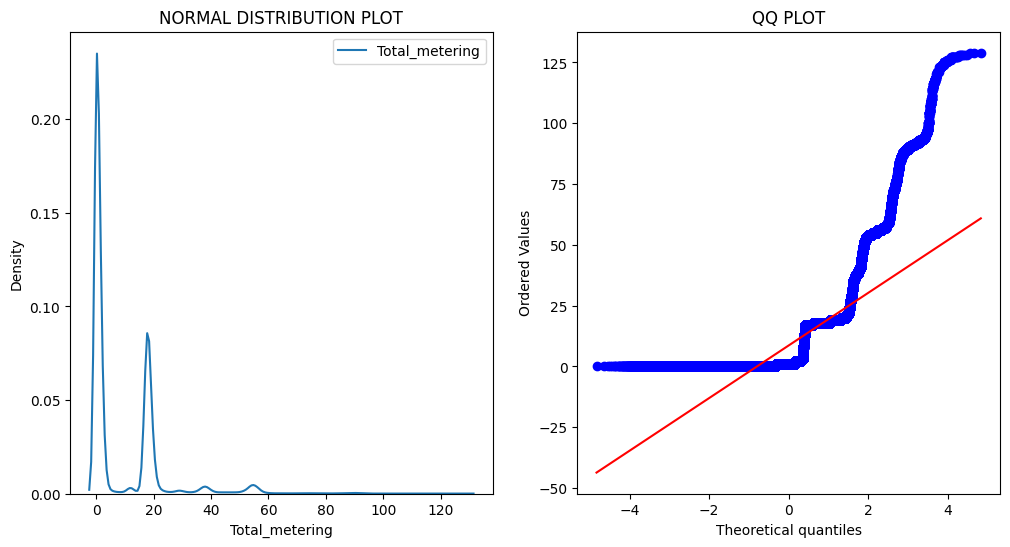

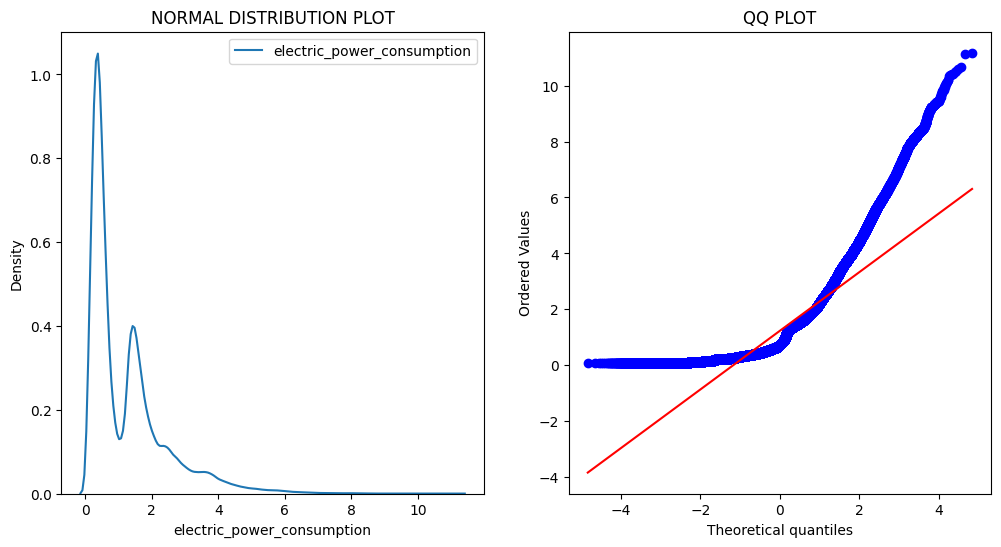

In [13]:
plot_col(df , list(df.drop(['Date'] , axis = 1).columns))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


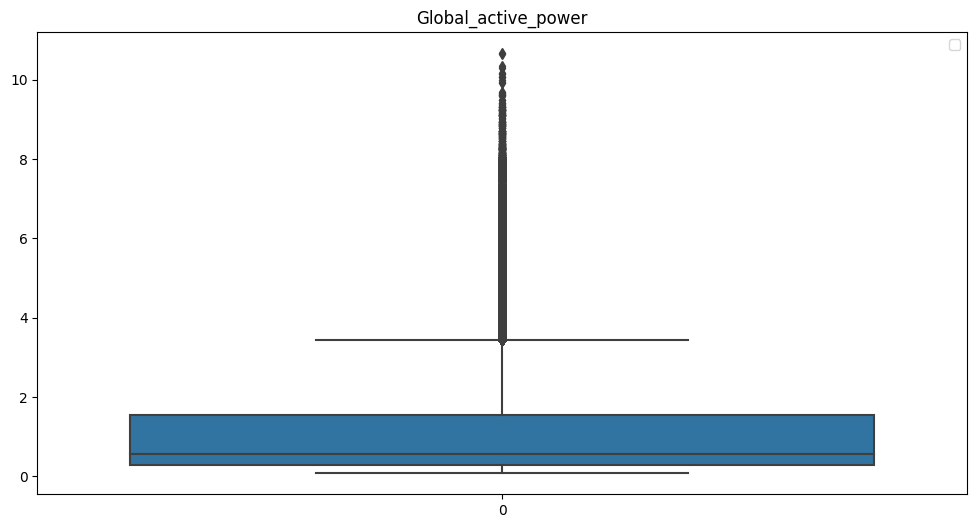

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


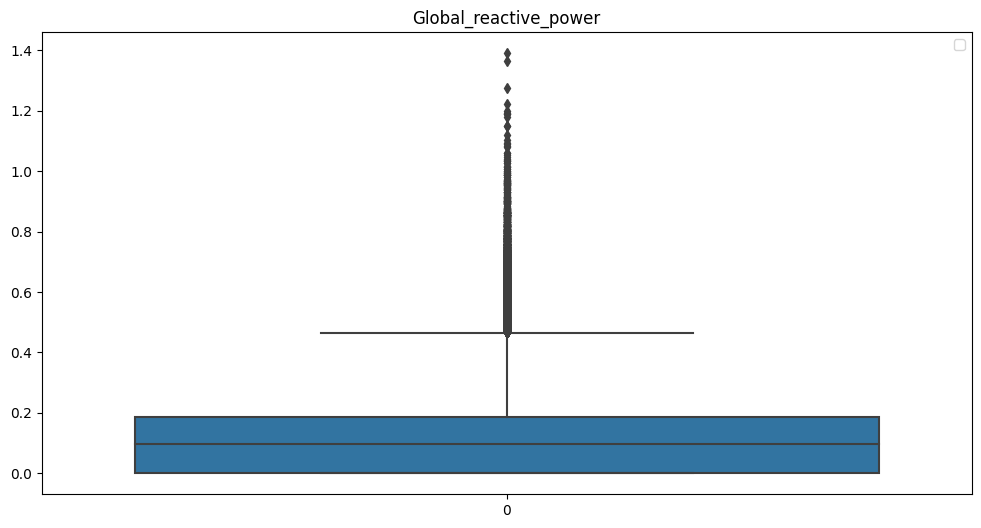

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


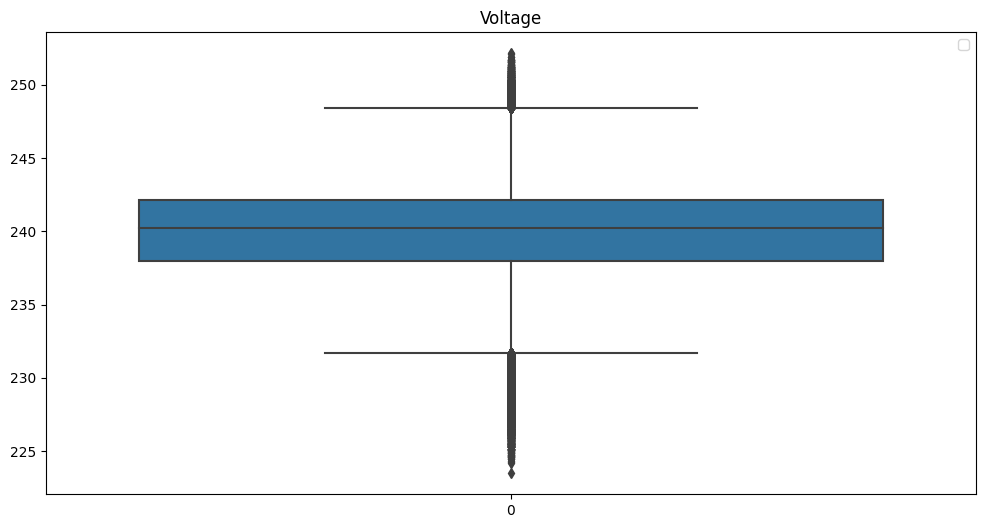

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


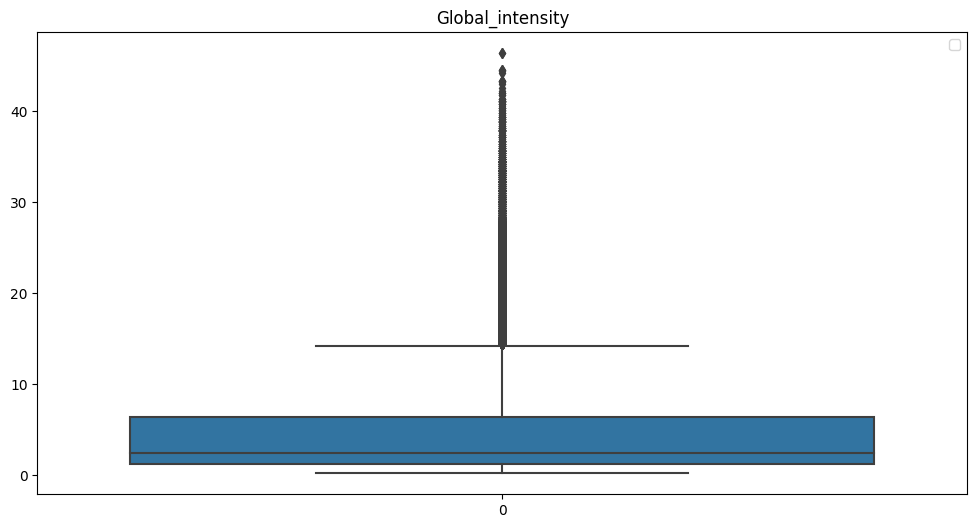

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


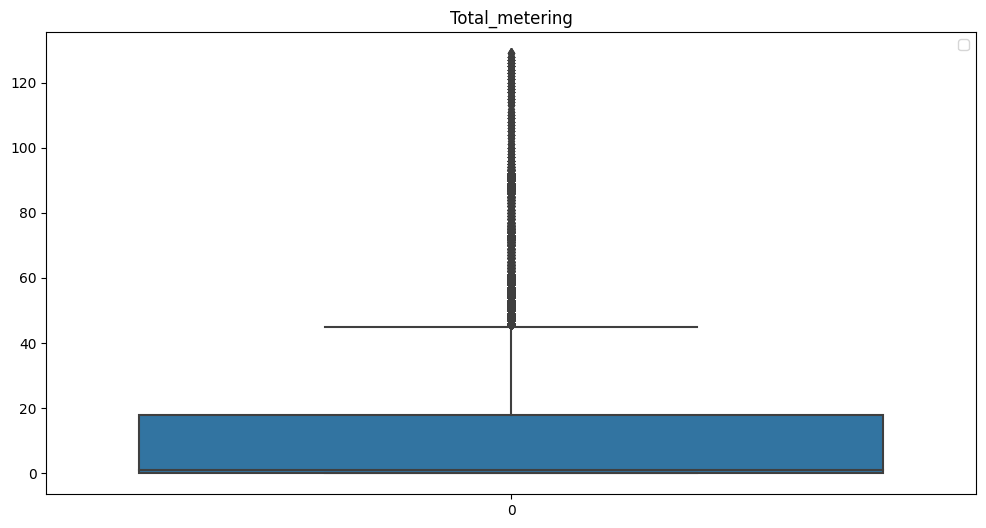

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


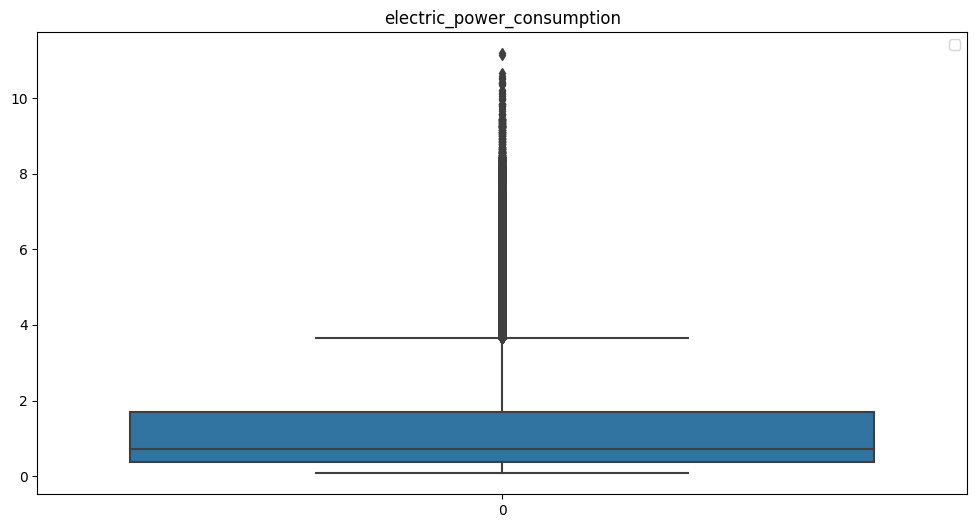

In [14]:
def plot_outlier(data , cols):
    i = 0
    for val in cols:
        plt.figure(figsize=(12, 6)) 
        sns.boxplot(data[val])
        
        plt.title(cols[i])
        plt.legend()
        plt.show()
        i = i+1
        
plot_outlier(df , ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Total_metering','electric_power_consumption'])

In [11]:
X = df.iloc[: , 1:-1]
y = df.iloc[: , -1]

In [12]:
pipeline = Pipeline([
    ('ColumnTransformer' , ColumnTransformer(transformers=[
        ('trf1' , FunctionTransformer(func=np.log1p) , ['Global_active_power','Global_reactive_power',
                                                        'Global_intensity','Total_metering'])
    ] , remainder='passthrough')),
    ('StandardScaler' , StandardScaler())
])

In [13]:
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_metering
0,4.216,0.418,234.84,18.4,18.0
1,5.360,0.436,233.63,23.0,17.0
2,5.374,0.498,233.29,23.0,19.0
3,5.388,0.502,233.74,23.0,18.0
4,3.666,0.528,235.68,15.8,18.0
...,...,...,...,...,...
1048570,0.426,0.076,242.27,1.8,0.0
1048571,0.424,0.076,242.10,1.8,0.0
1048572,0.422,0.076,241.73,1.8,0.0
1048573,0.422,0.078,242.56,1.8,0.0


In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=45 ,test_size=0.2)

In [15]:
X_train_trf = pipeline.fit_transform(X_train)
X_test_trf = pipeline.transform(X_test)

In [16]:
# plot_col(pd.DataFrame(X_train_trf , columns = X_train.columns) , list(X_train.columns))

NameError: name 'plot_col' is not defined

In [17]:
huber_reg = HuberRegressor(epsilon=2.0, alpha=1e-6, max_iter=100)  # Example values for epsilon and alpha
huber_reg.fit(X_train, y_train)
y_pred = huber_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_pred , y_test)
print("Mean Squared Error ::", mse)
print('r2 Score is ::',r2)

Mean Squared Error :: 0.00024334581968085806
r2 Score is :: 0.9998201381908942


C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
# y_train_cleaned = np.where(np.isinf(y_train), np.nanmax(np.isfinite(y_train)), y_train)

# xgb_reg = XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth=5, n_estimators = 200, subsample=0.9,random_state=42)
# xgb_reg.fit(X_train_trf , y_train)
# y_pred = xgb_reg.predict(X_test_trf)
# mse = mean_squared_error(y_test, y_pred)
# print("Validation Mean Squared Error:", mse)


In [23]:
print('Cross_val_score is :: ',np.mean(cross_val_score(huber_reg , X , y , scoring='r2' , cv=5))) #  0.999995722723653

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converg

Cross_val_score is ::  0.999995722723653


C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [19]:
df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_metering,electric_power_consumption
0,2006-12-16,4.216,0.418,234.84,18.4,18.0,4.634
1,2006-12-16,5.360,0.436,233.63,23.0,17.0,5.796
2,2006-12-16,5.374,0.498,233.29,23.0,19.0,5.872
3,2006-12-16,5.388,0.502,233.74,23.0,18.0,5.890
4,2006-12-16,3.666,0.528,235.68,15.8,18.0,4.194
...,...,...,...,...,...,...,...
1048570,2008-12-13,0.426,0.076,242.27,1.8,0.0,0.502
1048571,2008-12-13,0.424,0.076,242.10,1.8,0.0,0.500
1048572,2008-12-13,0.422,0.076,241.73,1.8,0.0,0.498
1048573,2008-12-13,0.422,0.078,242.56,1.8,0.0,0.500


In [25]:
features_to_predict = np.array([3.266,0.000,237.13,13.8,18.0]).reshape(1, -1)

# Making predictions
y1 = huber_reg.predict(features_to_predict)

print("Predicted value:", y1)

Predicted value: [3.25662674]


C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HuberRegressor was fitted with feature names
  warnings.warn(


In [26]:
# import pickle

# pickle.dump(huber_reg,open('model.pkl','wb'))